In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
lr = LinearRegression()
sb.set() 

# 01: Motivation/Rationale 

Our quest for a high economic wellbeing may have potentially caused elevated stress levels and deteriorating mental health, resulting in the increasing suicide rates. NTU also has a university wellbeing office to take care of students' mental wellbeing. Hence, as NTU students who will be entering the workforce in a short few years, we are concerned about this issue.

Hence, we found the dataset: **Suicide_Rates_Overview** which compiles data on countries' economic wellbeing and their suicide rates. We believe that this dataset as well as question is relevant to our society today as many of us may be looking to attain a high economic well being to escape the rising cost of living. From this, we hope to acheive a better understanding on whether our quest for a high economic wellbeing will affect the suicide rates.

#### Question:
## How does a country's economic well being affect suicide rates among different demographic categories?



# 02: Data Preperation and Cleaning

In [2]:
# Import dataset
suicideData = pd.read_csv('Suicide_Rates_Overview.csv')

suicideData.info()
suicideData

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             27820 non-null  object 
 1   year                27820 non-null  int64  
 2   sex                 27820 non-null  object 
 3   age                 27820 non-null  object 
 4   suicides_no         27820 non-null  int64  
 5   population          27820 non-null  int64  
 6   suicides/100k pop   27820 non-null  float64
 7   country-year        27820 non-null  object 
 8   HDI for year        8364 non-null   float64
 9   gdp_for_year ($)    27820 non-null  object 
 10  gdp_per_capita ($)  27820 non-null  int64  
 11  generation          27820 non-null  object 
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,Uzbekistan,2014,female,35-54 years,107,3620833,2.96,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation X
27816,Uzbekistan,2014,female,75+ years,9,348465,2.58,Uzbekistan2014,0.675,"63,067,077,179",2309,Silent
27817,Uzbekistan,2014,male,5-14 years,60,2762158,2.17,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z
27818,Uzbekistan,2014,female,5-14 years,44,2631600,1.67,Uzbekistan2014,0.675,"63,067,077,179",2309,Generation Z


To determine a country's economic wellbeing, we need the variables (GDP & HDI). Hence, we chose <b>HDI per year</b>. For GDP, we chose <b>GDP per capita</b> instead of GDP per year as each country's population is different. GDP Per Capita makes it relatively easier to compare across countries and to adjust for different levels of purchasing power from one country to the next.

**Gross Domestic Product (GDP) per capita :** *Measures the economic output of a nation per person to determine the standard of living and quality of life of a population.*

**Human Development Index (HDI) :** *Measures a country's level of social and economic development that comprises of mean years of schooling, expected years of schooling, life expectancy at birth, and gross national income per capita.*

To have a more accurate basis of comparison of the **suicide rates between countries**, we shall use **Suicides/100k pop** instead of **Suicides_no** as each country has a different population. (E.g. A high suicide number is not indicative of a high suicide rate if a country has a high population.)

In [3]:
sData = suicideData[[
    'country',
    'year',
    'sex',
    'age',
    'suicides/100k pop',
    'HDI for year',
    'gdp_per_capita ($)'
]]

##### As countries calculate their HDIs at different time periods, we filtered out the year where it coincides for most countries. 
Hence, we chose **2014** as the most recent year that most countries calculated their HDI.

In [4]:
sData = sData[(sData['year'] == 2014 )]

In [5]:
sData.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 936 entries, 564 to 27819
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             936 non-null    object 
 1   year                936 non-null    int64  
 2   sex                 936 non-null    object 
 3   age                 936 non-null    object 
 4   suicides/100k pop   936 non-null    float64
 5   HDI for year        900 non-null    float64
 6   gdp_per_capita ($)  936 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 58.5+ KB


##### Proceed to drop the countries (Rows) without HDI in the year 2014

In [6]:
sData = sData.dropna()

sData = sData.reset_index(drop=True)

sData.isnull().values.any()

False

In [7]:
sData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900 entries, 0 to 899
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   country             900 non-null    object 
 1   year                900 non-null    int64  
 2   sex                 900 non-null    object 
 3   age                 900 non-null    object 
 4   suicides/100k pop   900 non-null    float64
 5   HDI for year        900 non-null    float64
 6   gdp_per_capita ($)  900 non-null    int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 49.3+ KB


In [8]:
sData1 = sData.head(200)
sDataTable = pd.DataFrame(sData1)
sDataTable

,country,year,sex,age,suicides/100k pop,HDI for year,gdp_per_capita ($)
0,Antigua and Barbuda,2014,female,15-24 years,0.00,0.783,14093
1,Antigua and Barbuda,2014,female,25-34 years,0.00,0.783,14093
2,Antigua and Barbuda,2014,female,35-54 years,0.00,0.783,14093
3,Antigua and Barbuda,2014,female,5-14 years,0.00,0.783,14093
4,Antigua and Barbuda,2014,female,55-74 years,0.00,0.783,14093
...,...,...,...,...,...,...,...
195,Cuba,2014,female,75+ years,13.13,0.769,7459
196,Cuba,2014,male,25-34 years,12.80,0.769,7459
197,Cuba,2014,female,55-74 years,10.79,0.769,7459
198,Cuba,2014,male,15-24 years,8.14,0.769,7459


# 03: Exploratory Data Analysis

There are a total of **75** countries in our dataset. Hence, we proceed to take the **top 20%** of countries with the **highest/lowest** GDP per capita and HDI per year and the **top 20%** of countries with the **highest/lowest** suicide rates per 100k population. This indicates that we will take the **top 15** countries of the total 75 countries.

Since we do not know the relationship between a country's economic wellbeing and its suicide per 100k population, we have to consider both the **top/bottom 16 countries** with the **highest/lowest economic wellbeing** as well as the **highest/lowest suicide per 100k population**.

This aids us in finding out if there is a **inverse** or **positive** correlation, if any, between a country's economic wellbeing and its suicide rate per 100k population.

## Find the Country Economic Wellbeing: GDP & HDI

### Countries with the Highest Economic Wellbeing

In [9]:
wellbeing = sData[['country','gdp_per_capita ($)', 'HDI for year']]
wellbeing

,country,gdp_per_capita ($),HDI for year
0,Antigua and Barbuda,14093,0.783
1,Antigua and Barbuda,14093,0.783
2,Antigua and Barbuda,14093,0.783
3,Antigua and Barbuda,14093,0.783
4,Antigua and Barbuda,14093,0.783
...,...,...,...
895,Uzbekistan,2309,0.675
896,Uzbekistan,2309,0.675
897,Uzbekistan,2309,0.675
898,Uzbekistan,2309,0.675


Dropped countries with **GDP per capita < 50000** and **HDI < 0.85**. Doing so would result in only the **top 15** countries out of the 75 with the **highest** economic wellbeing.

In [10]:
wellbeing = wellbeing.drop(wellbeing[wellbeing['gdp_per_capita ($)'] < 50000].index)
wellbeing = wellbeing.drop(wellbeing[wellbeing['HDI for year'] < 0.85].index)
wellbeing

,country,gdp_per_capita ($),HDI for year
36,Australia,66809,0.935
37,Australia,66809,0.935
38,Australia,66809,0.935
39,Australia,66809,0.935
40,Australia,66809,0.935
...,...,...,...
871,United States,58531,0.915
872,United States,58531,0.915
873,United States,58531,0.915
874,United States,58531,0.915


#### Plot graph of Countries with highest: GDP per capita Vs HDI per year

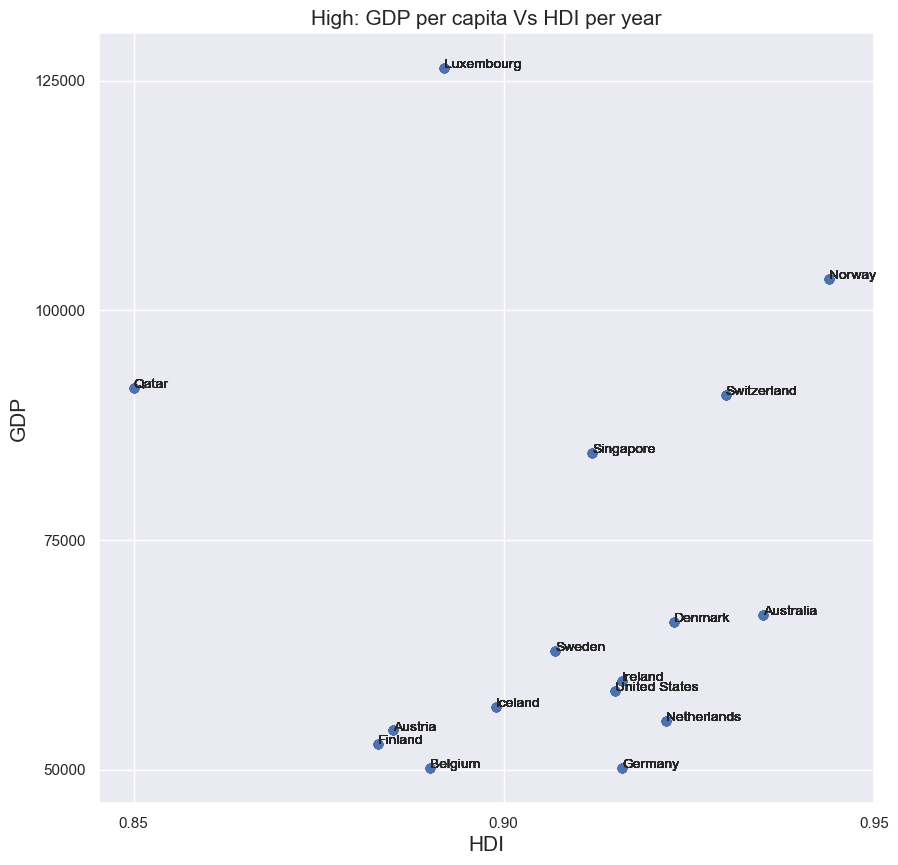

In [11]:
# Set the x-axis and y-axis values as tuples of (HDI, GDP) for each country
xy_values = list(zip(wellbeing['HDI for year'], wellbeing['gdp_per_capita ($)'] ))

# Set the country names as a list
country_names = wellbeing['country'].tolist()

# Create the figure with a larger size
plt.rcParams['figure.figsize'] = [10, 10]

# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter([xy[0] for xy in xy_values], [xy[1] for xy in xy_values])

# Add labels to the x and y axes
ax.set_xlabel('HDI', fontsize=15)
ax.set_ylabel('GDP', fontsize=15)

# Set the x-axis and y-axis intervals
ax.set_xticks([0.85, 0.90, 0.95])
ax.set_yticks([50000,75000,100000,125000])

# Add a title to the plot
ax.set_title('High: GDP per capita Vs HDI per year', fontsize=15)

# Add country names to the plot
for i, country in enumerate(country_names):
    ax.annotate(country, (xy_values[i][0], xy_values[i][1]),fontsize=10)

# Show the plot
plt.show()

In [12]:
print("These are the 16 countries with the highest economic wellbeing:\n")

# Highest economic wellbeing
HighEcon = []
for i in country_names:
    if i in HighEcon:
        pass
    else:
        HighEcon.append(i)
print(HighEcon)

These are the 16 countries with the highest economic wellbeing:

['Australia', 'Austria', 'Belgium', 'Denmark', 'Finland', 'Germany', 'Iceland', 'Ireland', 'Luxembourg', 'Netherlands', 'Norway', 'Qatar', 'Singapore', 'Sweden', 'Switzerland', 'United States']


Since Germany (GDP per capita:50167, HDI:0.916)and Belgium(GDP per capita:50173, HDI:0.89)are similar, and Qatar (GDP per capita:91587, HDI:0.85) has an unusually high GDP per capita, we decided not to drop anything of them and this resulted in us taking the **top 16 countries with highest economic wellbeing** instead of the top 15.

### Countries with Lowest Economic Wellbeing

In [13]:
wellbeing2 = sData[['country','gdp_per_capita ($)', 'HDI for year']]
wellbeing2

,country,gdp_per_capita ($),HDI for year
0,Antigua and Barbuda,14093,0.783
1,Antigua and Barbuda,14093,0.783
2,Antigua and Barbuda,14093,0.783
3,Antigua and Barbuda,14093,0.783
4,Antigua and Barbuda,14093,0.783
...,...,...,...
895,Uzbekistan,2309,0.675
896,Uzbekistan,2309,0.675
897,Uzbekistan,2309,0.675
898,Uzbekistan,2309,0.675


Dropped countries with **GDP per capita > 32000** and **HDI > 0.70**. Doing so would result in only the **top 15** countries out of the 75 with the **lowest** economic wellbeing.

In [14]:
wellbeing2 = wellbeing2.drop(wellbeing2[wellbeing2['gdp_per_capita ($)'] > 50000].index)
wellbeing2 = wellbeing2.drop(wellbeing2[wellbeing2['HDI for year'] > 0.732].index)
wellbeing2

,country,gdp_per_capita ($),HDI for year
96,Belize,5448,0.715
97,Belize,5448,0.715
98,Belize,5448,0.715
99,Belize,5448,0.715
100,Belize,5448,0.715
...,...,...,...
895,Uzbekistan,2309,0.675
896,Uzbekistan,2309,0.675
897,Uzbekistan,2309,0.675
898,Uzbekistan,2309,0.675


#### Plot graph of Countries with lowest: GDP per capita Vs HDI per year

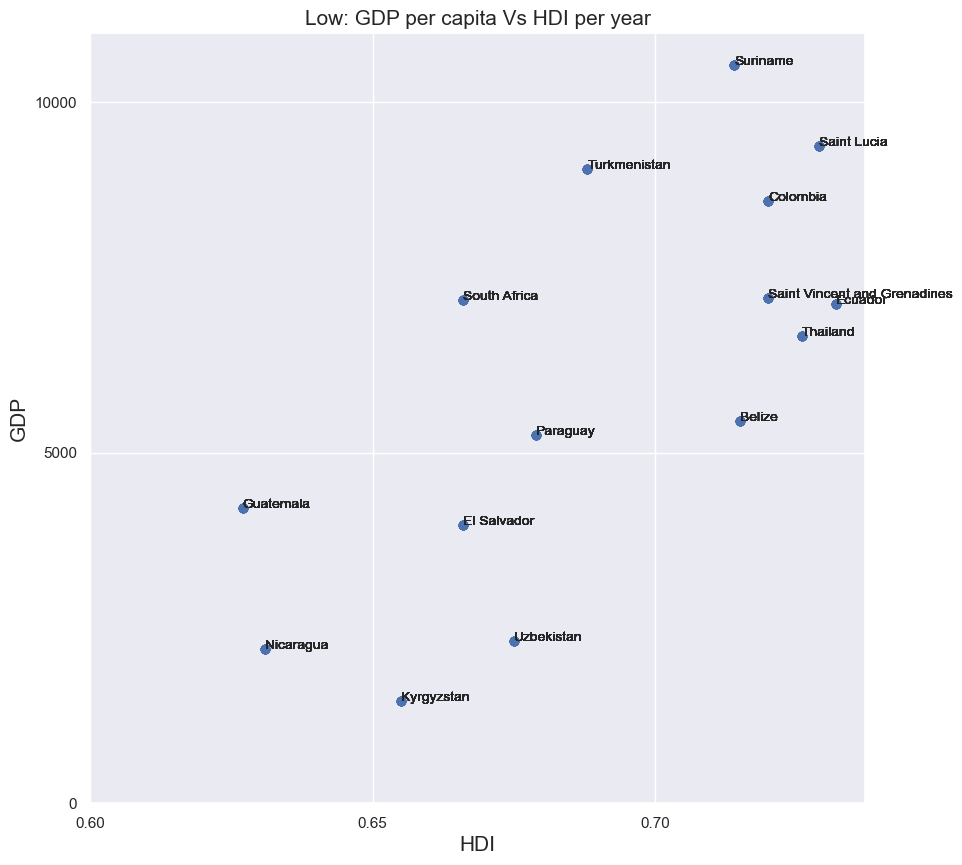

In [15]:
# Set the x-axis and y-axis values as tuples of (HDI, GDP) for each country
xy_values = list(zip(wellbeing2['HDI for year'], wellbeing2['gdp_per_capita ($)'] ))

# Set the country names as a list
country_names2 = wellbeing2['country'].tolist()

# Create the figure with a larger size
plt.rcParams['figure.figsize'] = [10, 10]

# Create a scatter plot
fig, ax = plt.subplots()
ax.scatter([xy[0] for xy in xy_values], [xy[1] for xy in xy_values])

# Add labels to the x and y axes
ax.set_xlabel('HDI', fontsize=15)
ax.set_ylabel('GDP', fontsize=15)

# Set the x-axis and y-axis intervals
ax.set_xticks([0.6, 0.65, 0.70])
ax.set_yticks([0,5000,10000])

# Add a title to the plot
ax.set_title('Low: GDP per capita Vs HDI per year', fontsize=15)

# Add country names to the plot
for i, country in enumerate(country_names2):
    ax.annotate(country, (xy_values[i][0], xy_values[i][1]),fontsize=10)

# Show the plot
plt.show()

In [16]:
print("These are the 15 countries with the lowest economic wellbeing:\n")

# Lowest economic wellbeing
LowEcon = []
for i in country_names2:
    if i in LowEcon:
        pass
    else:
        LowEcon.append(i)
print(LowEcon)

These are the 15 countries with the lowest economic wellbeing:

['Belize', 'Colombia', 'Ecuador', 'El Salvador', 'Guatemala', 'Kyrgyzstan', 'Nicaragua', 'Paraguay', 'Saint Lucia', 'Saint Vincent and Grenadines', 'South Africa', 'Suriname', 'Thailand', 'Turkmenistan', 'Uzbekistan']


## Find the Country Suicide Rate 

In [17]:
suicide_rates = sData['suicides/100k pop']
country_data = sData['country']

In [18]:
# The dataset splits the suicide per 100k population into gender and age groups. 
# Combined_country shows the overall suicide per 100k population of a country
combined_country = {}
for i in range(len(country_data)):
    if country_data[i] in combined_country:
        combined_country[country_data[i]] += float(suicide_rates[i])
    else:
        combined_country[country_data[i]] = float(suicide_rates[i])
combined_country

{'Antigua and Barbuda': 0.0,
 'Argentina': 111.35,
 'Armenia': 37.00999999999999,
 'Australia': 149.07,
 'Austria': 209.81999999999996,
 'Bahrain': 6.5200000000000005,
 'Belarus': 252.90999999999997,
 'Belgium': 201.85000000000002,
 'Belize': 90.95,
 'Bosnia and Herzegovina': 109.5,
 'Brazil': 73.13000000000001,
 'Bulgaria': 139.77,
 'Chile': 137.36999999999998,
 'Colombia': 66.62,
 'Costa Rica': 70.85,
 'Croatia': 222.04,
 'Cuba': 184.62999999999997,
 'Cyprus': 57.1,
 'Czech Republic': 175.28999999999994,
 'Denmark': 137.73,
 'Ecuador': 66.02000000000001,
 'El Salvador': 101.84,
 'Estonia': 258.90999999999997,
 'Finland': 177.16000000000005,
 'France': 179.56,
 'Georgia': 74.48999999999998,
 'Germany': 153.03999999999996,
 'Greece': 59.820000000000014,
 'Grenada': 0.0,
 'Guatemala': 45.88,
 'Hungary': 244.30999999999997,
 'Iceland': 197.95999999999998,
 'Ireland': 119.67999999999999,
 'Israel': 71.26000000000002,
 'Italy': 82.13000000000002,
 'Japan': 218.20999999999998,
 'Kazakhstan'

### Countries with the lowest suicide rate

Dropped countries with **Suicide/100k pop > 60**. Doing so would result in only the **top 15** countries out of the 75 with the **lowest** suicide rate.

In [19]:
# filtered_cc is a dictionary 
# Keys(top 15 countries with the lowest suicide rate) & Values(suicide/100k population as its values)
filtered_cc = {}
for key, value in combined_country.items():
    if value < 60:
        filtered_cc[key] = combined_country[key]
        
filtered_cc

{'Antigua and Barbuda': 0.0,
 'Armenia': 37.00999999999999,
 'Bahrain': 6.5200000000000005,
 'Cyprus': 57.1,
 'Greece': 59.820000000000014,
 'Grenada': 0.0,
 'Guatemala': 45.88,
 'Kuwait': 15.86,
 'Oman': 1.51,
 'Panama': 55.98,
 'Qatar': 18.989999999999995,
 'Seychelles': 43.33,
 'South Africa': 15.079999999999998,
 'Turkey': 30.830000000000005,
 'Turkmenistan': 28.15}

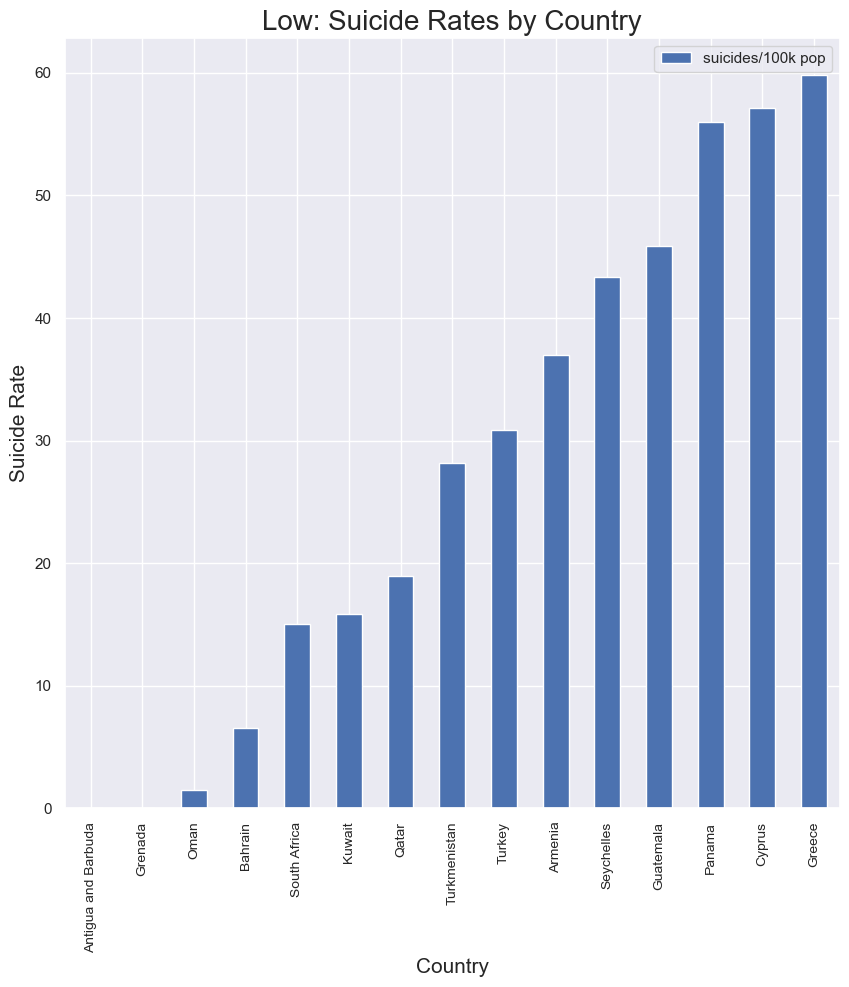

In [20]:
sorted_fcc = pd.DataFrame.from_dict(filtered_cc, orient='index', columns=['suicides/100k pop']).sort_values('suicides/100k pop')
sorted_fcc.plot(kind='bar')
plt.rcParams['figure.figsize'] = [10, 5]
plt.xticks(fontsize=10)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Suicide Rate', fontsize=15)
plt.title('Low: Suicide Rates by Country', fontsize=20)
plt.show()

In [21]:
print("These are the 15 countries with the lowest suicide rate:\n")

# Lowest suicide rate
LowSui = []
for i in filtered_cc:
    if i in LowSui:
        pass
    else:
        LowSui.append(i)
print(LowSui)

These are the 15 countries with the lowest suicide rate:

['Antigua and Barbuda', 'Armenia', 'Bahrain', 'Cyprus', 'Greece', 'Grenada', 'Guatemala', 'Kuwait', 'Oman', 'Panama', 'Qatar', 'Seychelles', 'South Africa', 'Turkey', 'Turkmenistan']


### Countries with the highest suicide rate

Dropped countries with **Suicide/100k pop < 210**. Doing so would result in only the **top 15** countries out of the 75 with the **highest** suicide rate.

In [22]:
filtered_cc2 = {}
for key, value in combined_country.items():
    if value > 210:
        filtered_cc2[key] = combined_country[key]
        
filtered_cc2

{'Belarus': 252.90999999999997,
 'Croatia': 222.04,
 'Estonia': 258.90999999999997,
 'Hungary': 244.30999999999997,
 'Japan': 218.20999999999998,
 'Kazakhstan': 257.09,
 'Latvia': 248.81000000000003,
 'Lithuania': 401.2700000000001,
 'Serbia': 216.78,
 'Slovenia': 240.36999999999998,
 'Suriname': 357.34,
 'Ukraine': 250.5,
 'Uruguay': 248.63999999999993}

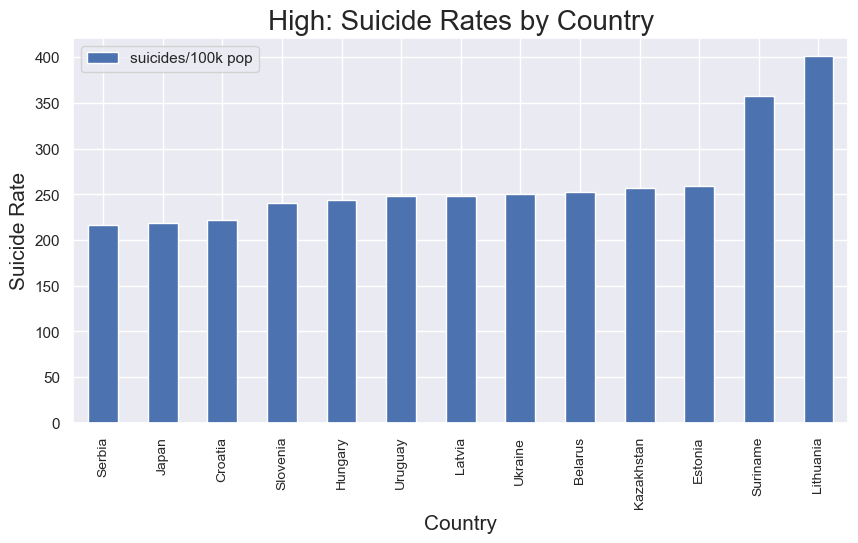

In [23]:
sorted_fcc2 = pd.DataFrame.from_dict(filtered_cc2, orient='index', columns=['suicides/100k pop']).sort_values('suicides/100k pop')
sorted_fcc2.plot(kind='bar')
plt.rcParams['figure.figsize'] = [10, 5]
plt.xticks(fontsize=10)
plt.xlabel('Country', fontsize=15)
plt.ylabel('Suicide Rate', fontsize=15)
plt.title('High: Suicide Rates by Country', fontsize=20)
plt.show()

In [24]:
print("These are the 15 countries with the highest suicide rate:\n")

# Highest suicide rate
HighSui = []
for i in filtered_cc2:
    if i in HighSui:
        pass
    else:
        HighSui.append(i)
print(HighSui)

These are the 15 countries with the highest suicide rate:

['Belarus', 'Croatia', 'Estonia', 'Hungary', 'Japan', 'Kazakhstan', 'Latvia', 'Lithuania', 'Serbia', 'Slovenia', 'Suriname', 'Ukraine', 'Uruguay']


## ECONOMIC WELLBEING VS SUICIDE

In [25]:
print("\033[1mHighest economic wellbeing\033[0m\n-")
print(HighEcon)

print("\n\033[1mLowest economic wellbeing\033[0m\n-")
print(LowEcon)

print("\n\033[1mHighest suicide rate\033[0m\n-")
print(HighSui)

print("\n\033[1mLowest suicide rate\033[0m\n-")
print(LowSui)

print("\n\n\033[1m\033[4mCompare the Economic Wellbeing and the Suicide Rate\033[0m\033[0m\n")

print("\n\033[1mCountries with the highest economic wellbeing and lowest suicide rate\033[0m\n-")
HighEconLowSui = []
for i in HighEcon:
    if i in LowSui:
        HighEconLowSui.append(i)
print(HighEconLowSui)

print("\n\033[1mCountries with the highest economic wellbeing and highest suicide rate\033[0m\n-")
HighEconHighSui = []
for i in HighEcon:
    if i in HighSui:
        HighEconHighSui.append(i)
print(HighEconHighSui)

print("\n\033[1mCountries with the lowest economic wellbeing and highest suicide rate\033[0m\n-")
LowEconHighSui = []
for i in LowEcon:
    if i in HighSui:
        LowEconHighSui.append(i)
print(LowEconHighSui)

print("\n\033[1mCountries with the lowest economic wellbeing and lowest suicide rate\033[0m\n-")
LowEconLowSui = []
for i in LowEcon:
    if i in LowSui:
        LowEconLowSui.append(i)
print(LowEconLowSui)

Highest economic wellbeing
-
['Australia', 'Austria', 'Belgium', 'Denmark', 'Finland', 'Germany', 'Iceland', 'Ireland', 'Luxembourg', 'Netherlands', 'Norway', 'Qatar', 'Singapore', 'Sweden', 'Switzerland', 'United States']

Lowest economic wellbeing
-
['Belize', 'Colombia', 'Ecuador', 'El Salvador', 'Guatemala', 'Kyrgyzstan', 'Nicaragua', 'Paraguay', 'Saint Lucia', 'Saint Vincent and Grenadines', 'South Africa', 'Suriname', 'Thailand', 'Turkmenistan', 'Uzbekistan']

Highest suicide rate
-
['Belarus', 'Croatia', 'Estonia', 'Hungary', 'Japan', 'Kazakhstan', 'Latvia', 'Lithuania', 'Serbia', 'Slovenia', 'Suriname', 'Ukraine', 'Uruguay']

Lowest suicide rate
-
['Antigua and Barbuda', 'Armenia', 'Bahrain', 'Cyprus', 'Greece', 'Grenada', 'Guatemala', 'Kuwait', 'Oman', 'Panama', 'Qatar', 'Seychelles', 'South Africa', 'Turkey', 'Turkmenistan']


Compare the Economic Wellbeing and the Suicide Rate


Countries with the highest economic wellbeing and lowest suicide rate
-
['Qatar']

Countries with

From this, we observe that only **at most 3** of the top 15 countries that had the highest/lowest economic wellbeing coincided with the top 15 countries with the highest/lowest suicide rates (suicides/100k pop).This indicates that a country's economic wellbeing and its suicide rate would not have a strong correlation. Based on the data, they seem to have a weak positive correlation.

## Correlation between Economic Wellbeing (GDP and HDI) and its Suicide Rate

We will now proceed to give visual representation baased on the data we have found above. We plan to use a scatter plot with HDI & GDP as the x,y-axis and use a third variable (Suicide/100k pop) to represent the color of the data point.

In [26]:
gdp_pc = sData['gdp_per_capita ($)']
hdi_py = sData['HDI for year']
suicide_rates = sData['suicides/100k pop']
country_data = sData['country']

In [27]:
combined_gdp = {}
combined_hdi = {}
for i in range(len(gdp_pc)):
    if gdp_pc[i] not in combined_gdp:
        combined_gdp[country_data[i]] = float(gdp_pc[i])
for i in range(len(hdi_py)):
    if hdi_py[i] not in combined_hdi:
        combined_hdi[country_data[i]] = float(hdi_py[i])

### Highest Economic wellbeing and its Suicide Rate

In [28]:
filtered_gdp = {}
for key, value in combined_gdp.items():
    if value >= 50000:
        filtered_gdp[key] = combined_gdp[key]
        
filtered_hdi = {}
for key, value in combined_hdi.items():
    if value >= 0.85:
        filtered_hdi[key] = combined_hdi[key]

In [29]:
merge_dict = {}
    
keys1 = set(filtered_gdp.keys())
keys2 = set(filtered_hdi.keys())
keys3 = set(combined_country.keys())

for i in keys1:
    for j in keys2:
        if i==j:
            merge_dict.setdefault(i,[filtered_gdp[i]],).append(filtered_hdi[i])
            
keys4 = set(merge_dict.keys())
for a in keys3:
    for b in keys4:
        if a ==b:
            merge_dict.setdefault(a,[a]).append(combined_country[a])
            
merge_dict_df = pd.DataFrame.from_dict(merge_dict, orient='index', columns=[ 'gdp_per_capita ($)', 'HDI for year','suicides/100k pop'])



The intensity of the color of the data point shows the suicide/100k population
The lighter the color, the higher the suicide/1ook population and vice versa


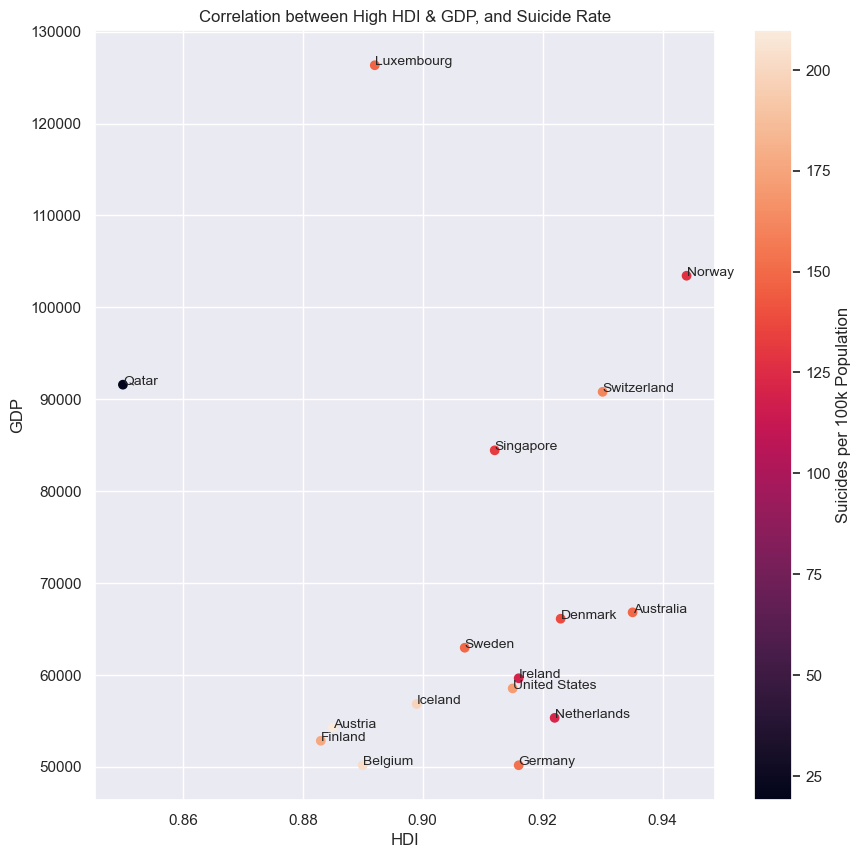

In [30]:
# Set the x-axis and y-axis values as tuples of (HDI, GDP) for each country
xy_values = list(zip(merge_dict_df['HDI for year'], merge_dict_df['gdp_per_capita ($)'] ))

# Set the country names as a list
related_country = merge_dict_df.index.tolist()

# Create the figure with a larger size
plt.rcParams['figure.figsize'] = [10, 10]

# Create a scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter([xy[0] for xy in xy_values], [xy[1] for xy in xy_values], c=merge_dict_df['suicides/100k pop'])

# Set the title and labels for the plot
plt.title('Correlation between High HDI & GDP, and Suicide Rate')
plt.xlabel('HDI')
plt.ylabel('GDP')

# Add a colorbar legend to the plot
colorbar = plt.colorbar(scatter)
colorbar.set_label('Suicides per 100k Population')

# Add country names to the plot
for i, country in enumerate(related_country):
    ax.annotate(country, (xy_values[i][0], xy_values[i][1]),fontsize=10)
print('\n')
print('The intensity of the color of the data point shows the suicide/100k population\n\033[1mThe lighter the color, the higher the suicide/1ook population and vice versa\033[0m')

# Show the plot
plt.show()

High Econ vs Suicide Rate



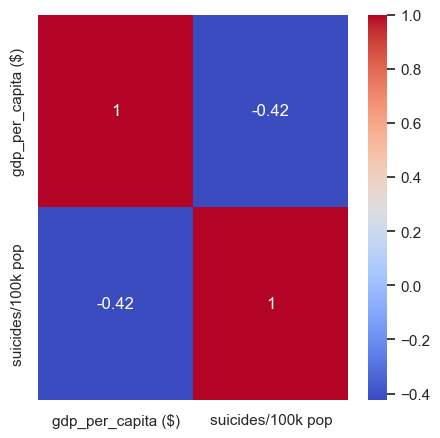

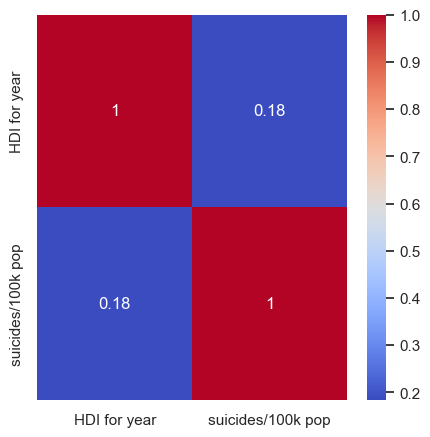

In [31]:
print("\033[1mHigh Econ vs Suicide Rate\033[0m\n")

# Create the figure with a larger size
plt.rcParams['figure.figsize'] = [5, 5]

# Compute the correlation matrix
corr_matrix = merge_dict_df[['gdp_per_capita ($)','suicides/100k pop' ]].corr()

# Create a heatmap
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

# Compute the correlation matrix
corr_matrix = merge_dict_df[['HDI for year','suicides/100k pop' ]].corr()

# Create a heatmap
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

From the above heatmaps, we can see that **GDP per capita** has a *weak negative correlation* with suicides/100k pop & **HDI for year** has a *weak positive correlation* with suicides/100k pop.

Both indicators are not related to suicide/100k population in the way. Hence, when they are used together, we get at most 1 country (Qatar or Suriname), that indicates a very weak negative correlation.

### Lowest Economic wellbeing and its Suicide Rate

In [32]:
filtered_gdp2 = {}
for key, value in combined_gdp.items():
    if value <= 50000:
        filtered_gdp2[key] = combined_gdp[key]
        
filtered_hdi2 = {}
for key, value in combined_hdi.items():
    if value <= 0.732:
        filtered_hdi2[key] = combined_hdi[key]

In [33]:
merge_dict2 = {}
    
keys1 = set(filtered_gdp2.keys())
keys2 = set(filtered_hdi2.keys())
keys3 = set(combined_country.keys())

for i in keys1:
    for j in keys2:
        if i==j:
            merge_dict2.setdefault(i,[filtered_gdp2[i]],).append(filtered_hdi2[i])
            
keys4 = set(merge_dict2.keys())
for a in keys3:
    for b in keys4:
        if a ==b:
            merge_dict2.setdefault(a,[a]).append(combined_country[a])

In [34]:
merge_dict_df2 = pd.DataFrame.from_dict(merge_dict2, orient='index', columns=[ 'gdp_per_capita ($)', 'HDI for year','suicides/100k pop'])



The intensity of the color of the data point shows the suicide/100k population
The darker the color, the lower the suicide/1ook population and vice versa


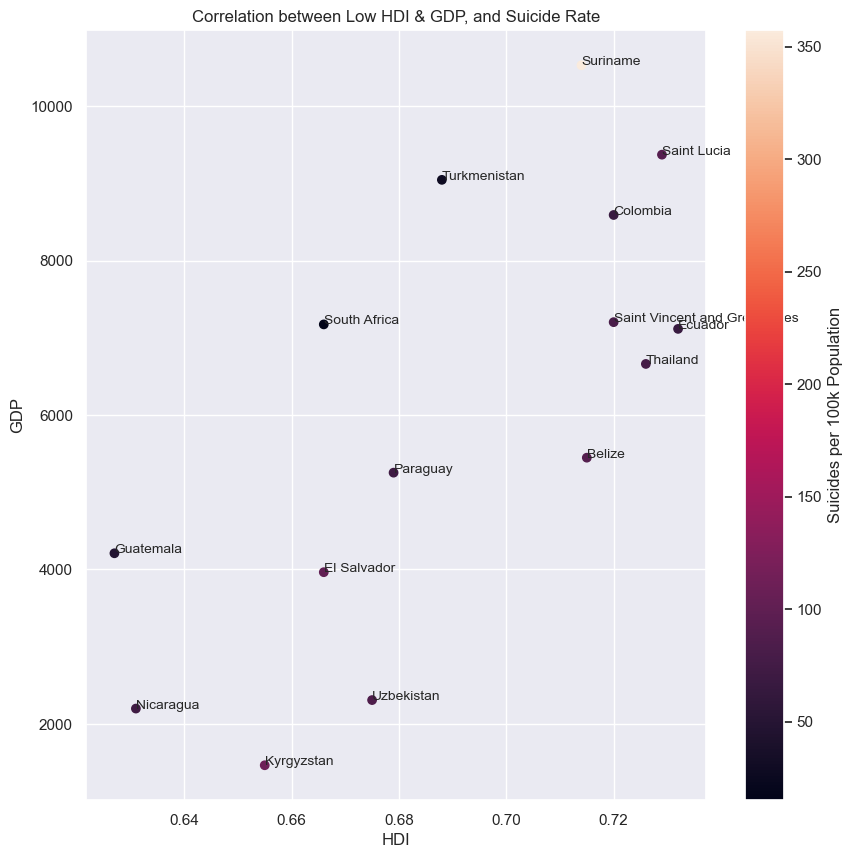

In [35]:
# Set the x-axis and y-axis values as tuples of (HDI, GDP) for each country
xy_values = list(zip(merge_dict_df2['HDI for year'], merge_dict_df2['gdp_per_capita ($)'] ))

# Set the country names as a list
related_country2 = merge_dict_df2.index.tolist()

# Create the figure with a larger size
plt.rcParams['figure.figsize'] = [10, 10]

# Create a scatter plot
fig, ax = plt.subplots()
scatter = ax.scatter([xy[0] for xy in xy_values], [xy[1] for xy in xy_values], c=merge_dict_df2['suicides/100k pop'])

# Set the title and labels for the plot
plt.title('Correlation between Low HDI & GDP, and Suicide Rate')
plt.xlabel('HDI')
plt.ylabel('GDP')

# Add a colorbar legend to the plot
colorbar = plt.colorbar(scatter)
colorbar.set_label('Suicides per 100k Population')

# Add country names to the plot
for i, country in enumerate(related_country2):
    ax.annotate(country, (xy_values[i][0], xy_values[i][1]),fontsize=10)

print('\n')
print('The intensity of the color of the data point shows the suicide/100k population\n\033[1mThe darker the color, the lower the suicide/1ook population and vice versa\033[0m')

# Show the plot
plt.show()

Low Econ vs Suicide Rate



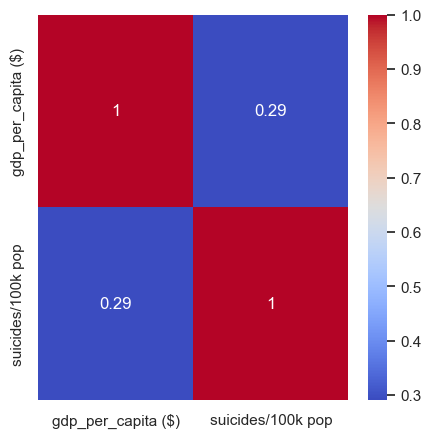

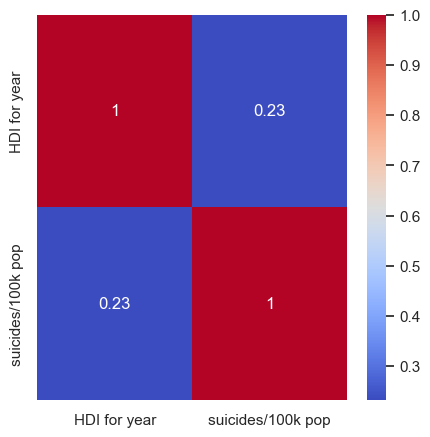

In [36]:
print("\033[1mLow Econ vs Suicide Rate\033[0m\n")

# Create the figure with a larger size
plt.rcParams['figure.figsize'] = [5, 5]

# Compute the correlation matrix
corr_matrix = merge_dict_df2[['gdp_per_capita ($)','suicides/100k pop' ]].corr()

# Create a heatmap
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

# Compute the correlation matrix
corr_matrix = merge_dict_df2[['HDI for year','suicides/100k pop' ]].corr()

# Create a heatmap
sb.heatmap(corr_matrix, cmap='coolwarm', annot=True)

# Show the plot
plt.show()

From the above heatmaps, we can see that both **GDP per capita** and **HDI for year** have a *weak positive correlation* with suicides/100k pop.

Hence, when these two indicators are used together, we get the 3 countries that had the lowest economic wellbeing and the lowest suicide rate.

## Demographic of the 5 countries

In [37]:
print("\033[1mCountries with the highest economic wellbeing and lowest suicide rate:\033[0m", HighEconLowSui)
print("\033[1mCountries with the highest economic wellbeing and highest suicide rate:\033[0m", HighEconHighSui)
print("\033[1mCountries with the lowest economic wellbeing and highest suicide rate:\033[0m", LowEconHighSui)
print("\033[1mCountries with the lowest economic wellbeing and lowest suicide rate:\033[0m", LowEconLowSui)

Countries with the highest economic wellbeing and lowest suicide rate: ['Qatar']
Countries with the highest economic wellbeing and highest suicide rate: []
Countries with the lowest economic wellbeing and highest suicide rate: ['Suriname']
Countries with the lowest economic wellbeing and lowest suicide rate: ['Guatemala', 'South Africa', 'Turkmenistan']




Suicide/100k population is the highest for males aged 15-24 and females aged 55-74 in Qatar.
The suicide/100k pop for males and females are similar.


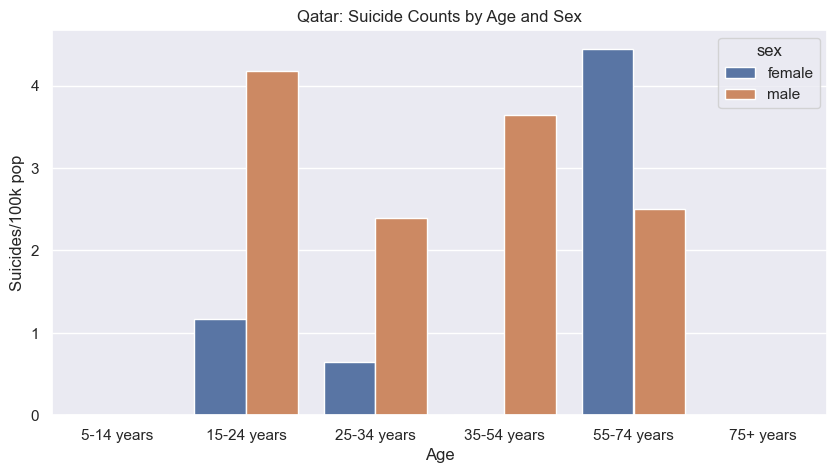

In [38]:
qatar = sData[(sData['country'] == "Qatar")].copy()

# convert age column to ordered categorical variable
qatar_ageorder = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
qatar['age'] = pd.Categorical(qatar['age'], categories=qatar_ageorder, ordered=True)


# Create the figure with a larger size
plt.rcParams['figure.figsize'] = [10, 5]

# create grouped bar plot
sb.barplot(x='age', y='suicides/100k pop', hue='sex', data=qatar.sort_values('age').reindex())

# set axis labels and title
plt.xlabel('Age')
plt.ylabel('Suicides/100k pop')
plt.title('Qatar: Suicide Counts by Age and Sex')

print('\n')
print('Suicide/100k population is the highest for males aged 15-24 and females aged 55-74 in Qatar.\nThe suicide/100k pop for males and females are similar.')

# show plot
plt.show()




Suicide/100k population is highest amongst males aged 75+ and females aged 25-34 in Suriname.
The difference in suicide/100k pop for males and females in Suriname is quite large.


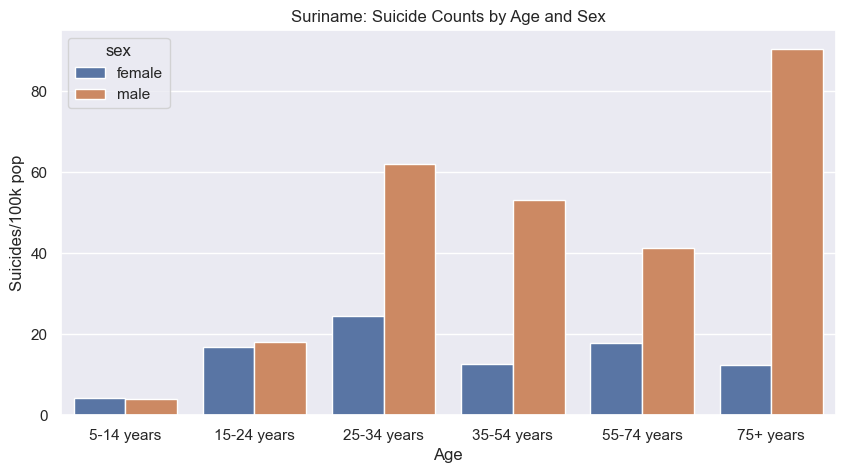

In [39]:
suriname = sData[(sData['country'] == "Suriname")].copy()

# convert age column to ordered categorical variable
suriname_ageorder = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
suriname['age'] = pd.Categorical(suriname['age'], categories=suriname_ageorder, ordered=True)

# Create the figure with a larger size
plt.rcParams['figure.figsize'] = [10, 5]

# create grouped bar plot
sb.barplot(x='age', y='suicides/100k pop', hue='sex', data=suriname.sort_values('age').reindex())

# set axis labels and title
plt.xlabel('Age')
plt.ylabel('Suicides/100k pop')
plt.title('Suriname: Suicide Counts by Age and Sex')

print('\n')
print('Suicide/100k population is highest amongst males aged 75+ and females aged 25-34 in Suriname.\nThe difference in suicide/100k pop for males and females in Suriname is quite large.')

# show plot
plt.show()



Suicide/100k population is highest amongst males aged 35-54 and females aged 15-24 in Guatemala.
The difference in suicide/100k pop for males and females is quite large and the figures for males are generally higher.


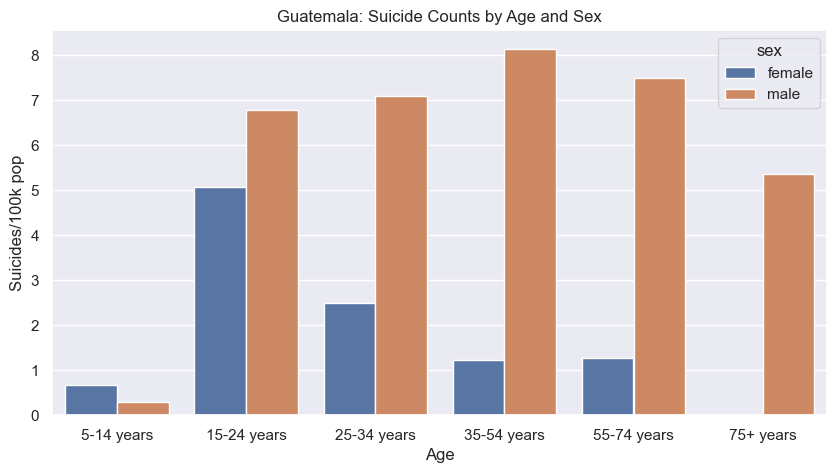

In [40]:
guatemala = sData[(sData['country'] == "Guatemala")].copy()

# convert age column to ordered categorical variable
guatemala_ageorder = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
guatemala['age'] = pd.Categorical(guatemala['age'], categories=guatemala_ageorder, ordered=True)

# Create the figure with a larger size
plt.rcParams['figure.figsize'] = [10, 5]

# create grouped bar plot
sb.barplot(x='age', y='suicides/100k pop', hue='sex', data=guatemala.sort_values('age').reindex())

# set axis labels and title
plt.xlabel('Age')
plt.ylabel('Suicides/100k pop')
plt.title('Guatemala: Suicide Counts by Age and Sex')

print('\n')
print('Suicide/100k population is highest amongst males aged 35-54 and females aged 15-24 in Guatemala.\nThe difference in suicide/100k pop for males and females is quite large and the figures for males are generally higher.')

# show plot
plt.show()



Suicide/100k population is highest amongst males aged 25-34 and females aged 15-24 in South Africa.
The difference in suicide/100k pop for males and females is quite large and the figures for males are generally higher.


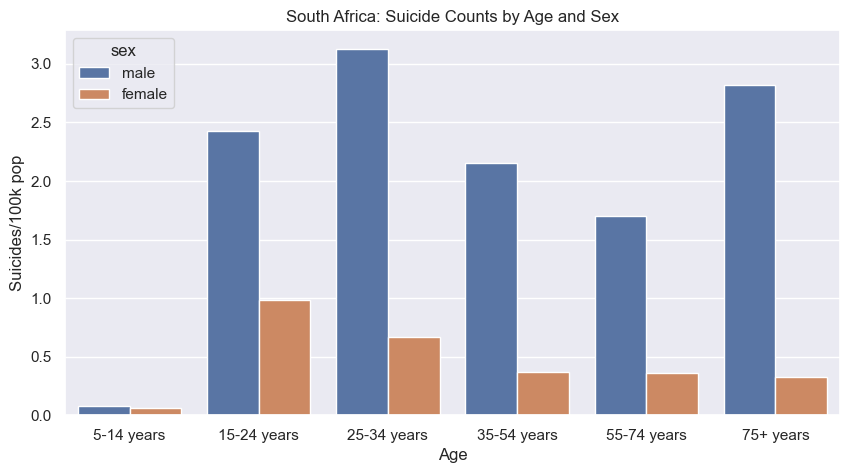

In [41]:
southafrica = sData[(sData['country'] == "South Africa")].copy()

# convert age column to ordered categorical variable
southafrica_ageorder = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
southafrica['age'] = pd.Categorical(southafrica['age'], categories=southafrica_ageorder, ordered=True)

# Create the figure with a larger size
plt.rcParams['figure.figsize'] = [10, 5]

# create grouped bar plot
sb.barplot(x='age', y='suicides/100k pop', hue='sex', data=southafrica.sort_values('age').reindex())

# set axis labels and title
plt.xlabel('Age')
plt.ylabel('Suicides/100k pop')
plt.title('South Africa: Suicide Counts by Age and Sex')

print('\n')
print('Suicide/100k population is highest amongst males aged 25-34 and females aged 15-24 in South Africa.\nThe difference in suicide/100k pop for males and females is quite large and the figures for males are generally higher.')

# show plot
plt.show()



Suicide/100k population is highest amongst males aged 35-54 and females aged 15-24 in Turkmenistan.
The difference in suicide/100k pop for males and females is quite large and the figures for males are generally higher.


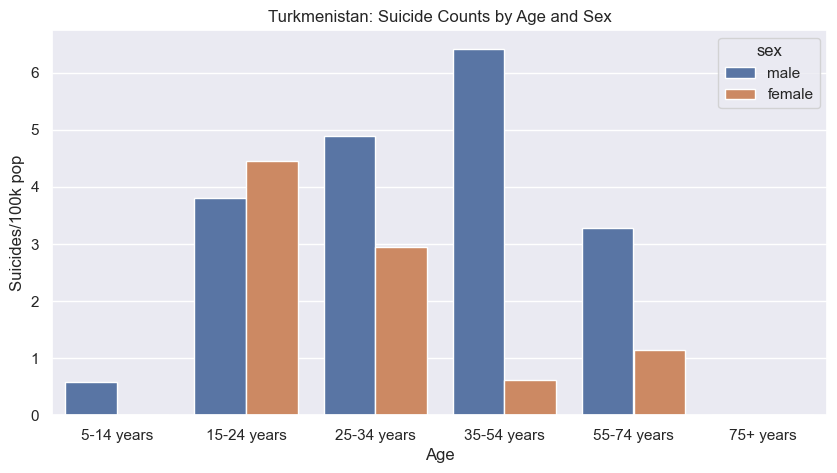

In [42]:
turkmenistan = sData[(sData['country'] == "Turkmenistan")].copy()

# convert age column to ordered categorical variable
turkmenistan_ageorder = ['5-14 years', '15-24 years', '25-34 years', '35-54 years', '55-74 years', '75+ years']
turkmenistan['age'] = pd.Categorical(turkmenistan['age'], categories=turkmenistan_ageorder, ordered=True)

# Create the figure with a larger size
plt.rcParams['figure.figsize'] = [10, 5]

# create grouped bar plot
sb.barplot(x='age', y='suicides/100k pop', hue='sex', data=turkmenistan.sort_values('age').reindex())

# set axis labels and title
plt.xlabel('Age')
plt.ylabel('Suicides/100k pop')
plt.title('Turkmenistan: Suicide Counts by Age and Sex')

print('\n')
print('Suicide/100k population is highest amongst males aged 35-54 and females aged 15-24 in Turkmenistan.\nThe difference in suicide/100k pop for males and females is quite large and the figures for males are generally higher.')

# show plot
plt.show()

# 04: Use of machine learning techniques to solve specific problem

## Linear Regression of Suicides throughout the years in Singapore

In [58]:
Singapore = suicideData[[
    'country',
    'year',
    'sex',
    'age',
    'suicides/100k pop',
]]
Singapore  = Singapore[(Singapore['country'] == "Singapore" )]
Singapore.head()

,country,year,sex,age,suicides/100k pop
22400,Singapore,1985,male,75+ years,144.65
22401,Singapore,1985,female,75+ years,77.55
22402,Singapore,1985,male,55-74 years,31.86
22403,Singapore,1985,female,55-74 years,19.98
22404,Singapore,1985,male,25-34 years,18.54


In [44]:
# Combine Singapore suicide data based on year
SGyrly = Singapore.groupby('year', as_index=False)['suicides/100k pop'].mean()

sgYR = pd.DataFrame(SGyrly['year'])
sgSR = pd.DataFrame(SGyrly['suicides/100k pop'])

In [57]:
# Split the Dataset into Train and Test
sgYR_train, sgYR_test, sgSR_train, sgSR_test = train_test_split(sgYR, sgSR, test_size = 0.20)

print("Train Set :", sgYR_train.shape, sgSR_train.shape)
print("Test Set  :", sgYR_test.shape, sgSR_test.shape)

lr.fit(sgYR_train, sgSR_train)

print('Intercept of Regression \t: b = ', lr.intercept_)
print('Coefficients of Regression \t: a = ', lr.coef_)

Train Set : (24, 1) (24, 1)
Test Set  : (7, 1) (7, 1)
Intercept of Regression 	: b =  [1247.35383338]
Coefficients of Regression 	: a =  [[-0.61527502]]


### Actual vs Predicted Suicide Rates (Train Data)

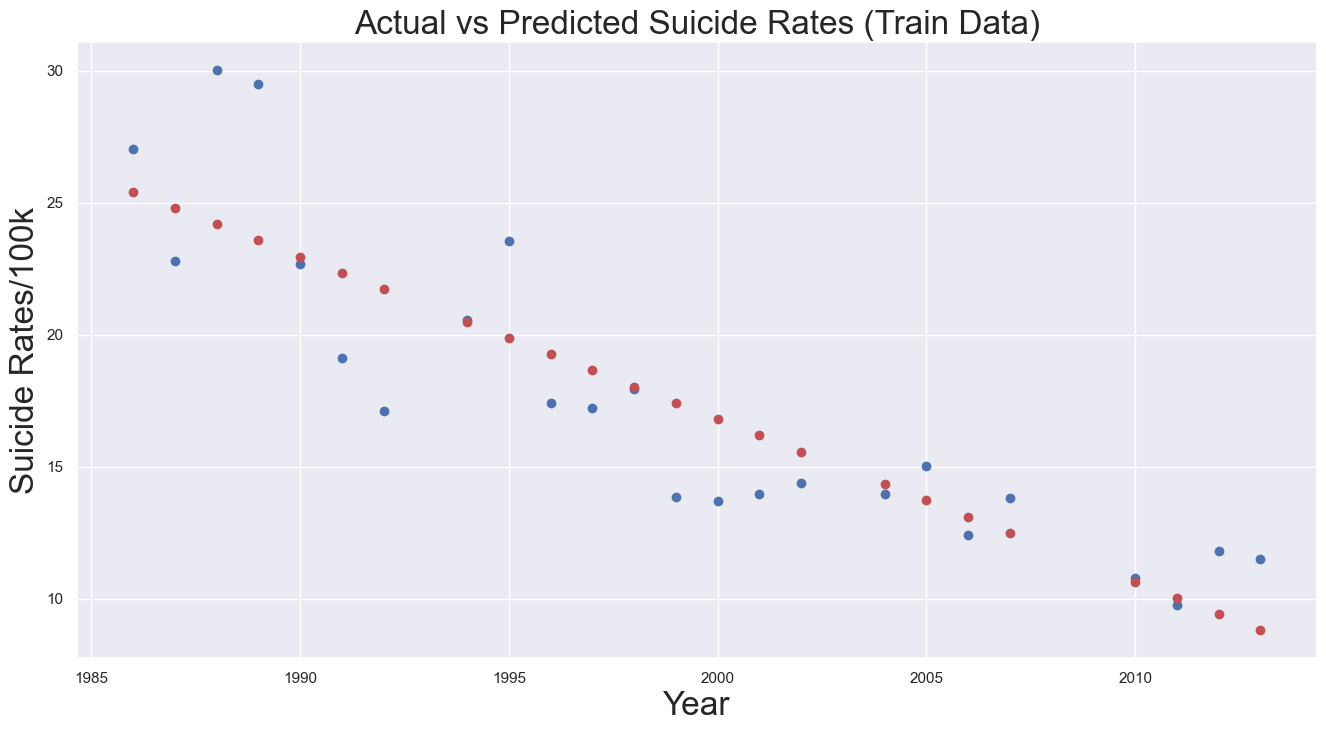

In [59]:
total_train_pred = lr.predict(sgYR_train)

f = plt.figure(figsize=(16, 8))
plt.xlabel('Year', size=24)
plt.ylabel('Suicide Rates/100k', size=24)
plt.scatter(sgYR_train,sgSR_train)
plt.scatter(sgYR_train, total_train_pred, color = "r")
plt.title('Actual vs Predicted Suicide Rates (Train Data)', size=24)
plt.show()

In [48]:
# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance (R^2) \t:", lr.score(sgYR_train, sgSR_train))

def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_squared_error(sgSR_train, total_train_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model 	Train Dataset
Explained Variance (R^2) 	: 0.8129937560527714
Mean Squared Error (MSE) 	: 6.210716587845216
Root Mean Squared Error (RMSE) 	: 2.492130933126351


### Actual vs Predicted Suicide Rates (Test Data)

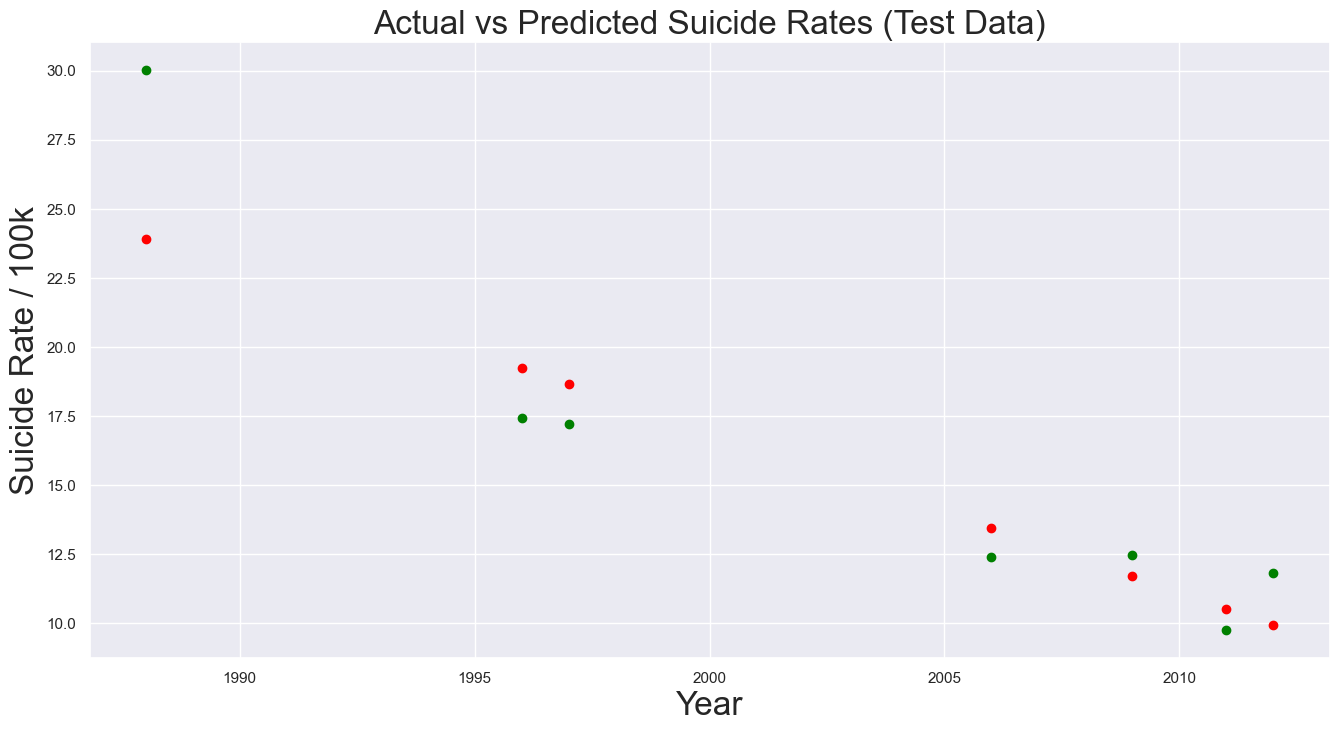

In [49]:
total_test_pred = lr.predict(sgYR_test)

# Plot the Predictions
f = plt.figure(figsize=(16, 8))
plt.xlabel('Year', size=24)
plt.ylabel('Suicide Rate / 100k', size=24);
plt.scatter(sgYR_test, sgSR_test, color = "green")
plt.scatter(sgYR_test, total_test_pred, color = "red")
plt.title('Actual vs Predicted Suicide Rates (Test Data)', size=24)
plt.show()

In [50]:
# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Explained Variance (R^2) \t:", lr.score(sgYR_test, sgSR_test))

def mean_sq_err(actual, predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) - np.array(predicted)))

mse = mean_squared_error(sgSR_test, total_test_pred)
print("Mean Squared Error (MSE) \t:", mse)
print("Root Mean Squared Error (RMSE) \t:", np.sqrt(mse))

Goodness of Fit of Model 	Test Dataset
Explained Variance (R^2) 	: 0.8279740117603024
Mean Squared Error (MSE) 	: 6.930591439963626
Root Mean Squared Error (RMSE) 	: 2.632601648552934


### Breakdown for different age groups across the years

In [51]:
# split the data into training and testing sets
train_data, test_data = train_test_split(Singapore, test_size=0.2)

####  linear regression line for each age group and sex (Train data)

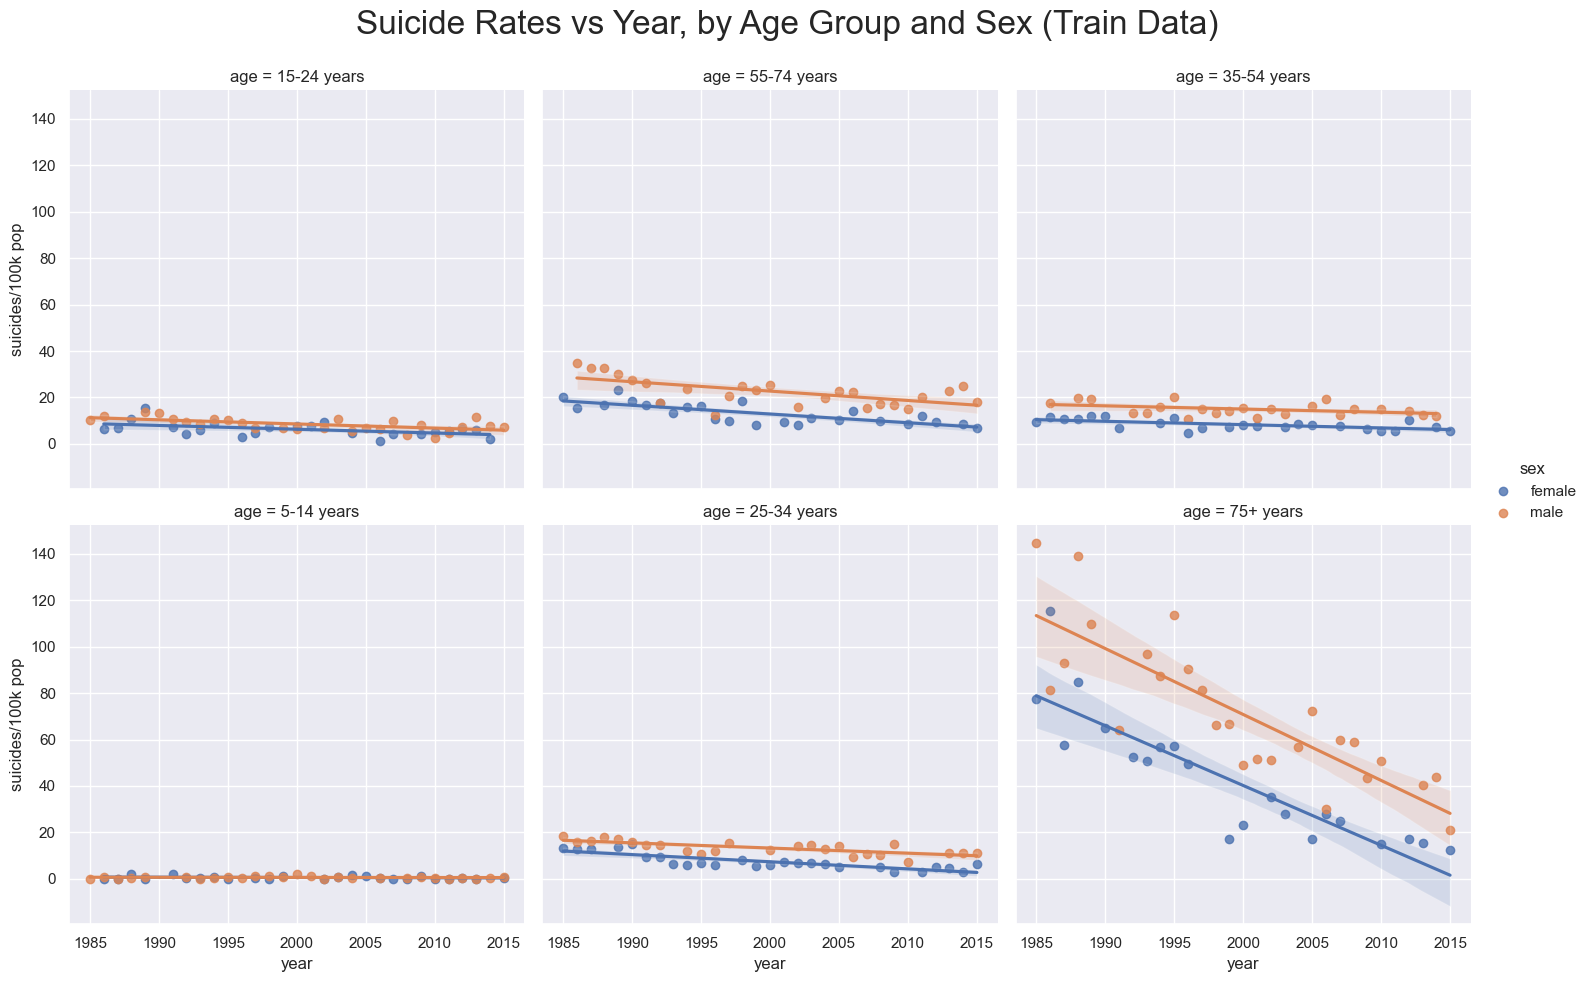

In [52]:
# create a scatterplot with a linear regression line for each age group and sex
g = sb.lmplot(x='year', y='suicides/100k pop', hue='sex', col='age', col_wrap=3, data=train_data)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Suicide Rates vs Year, by Age Group and Sex (Train Data)', size = 24)
plt.show()

Overall **decreasing** trend in Suicide rates in Singapore up till the year 2016

####  linear regression line for each age group and sex (Test data)

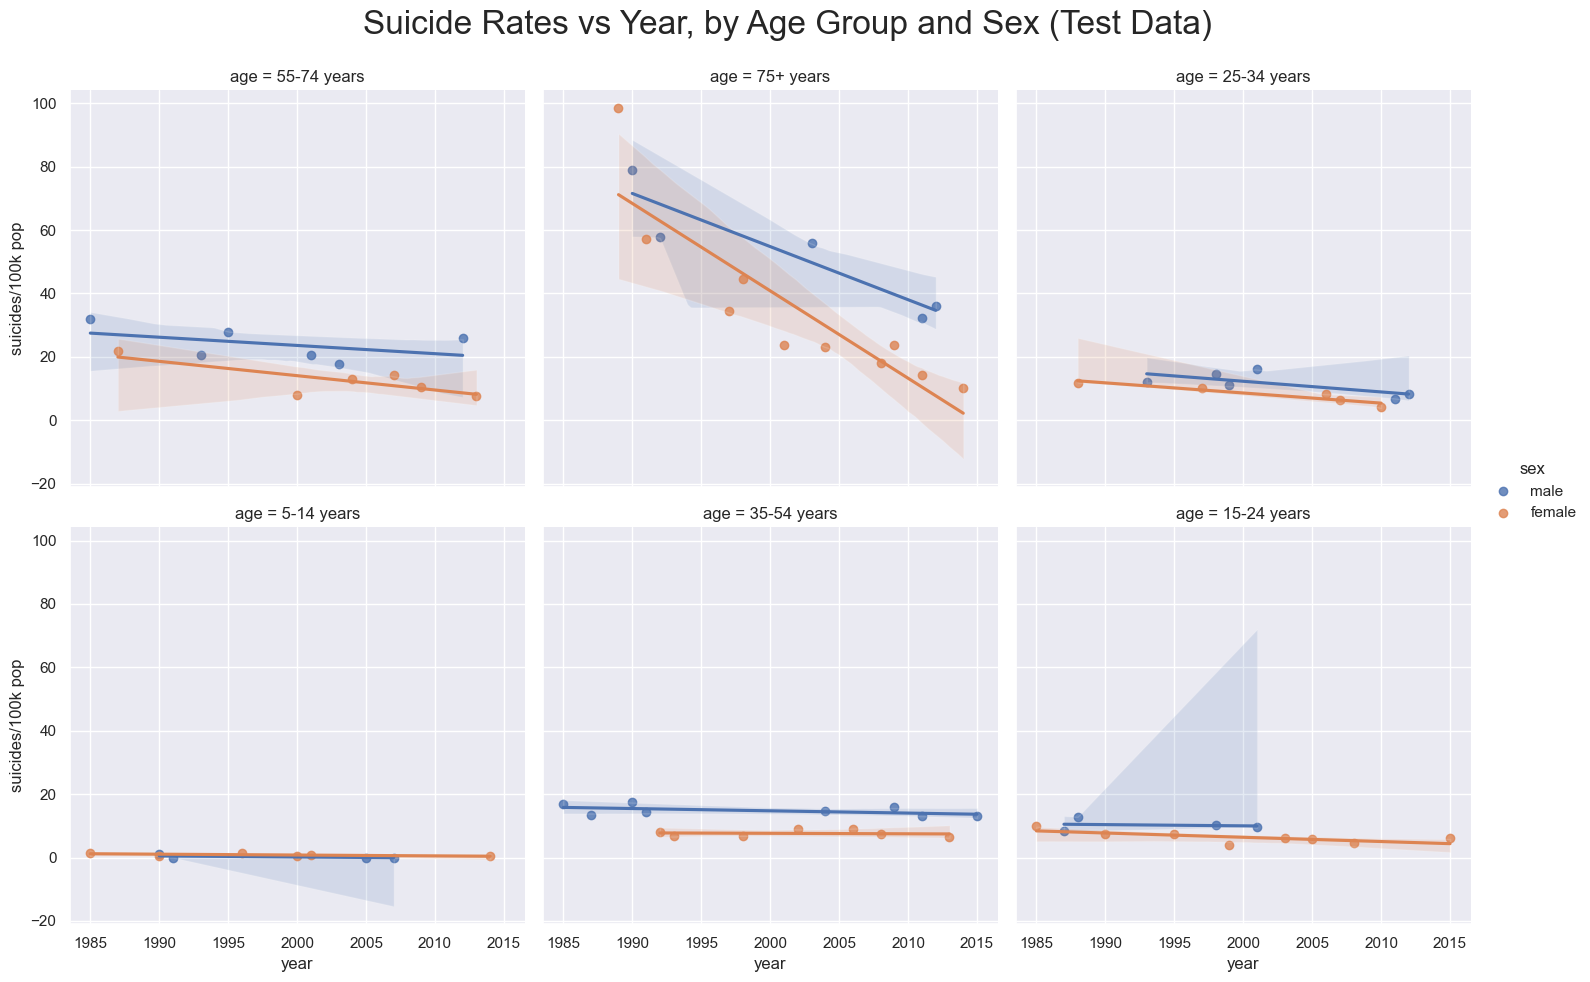

In [56]:
# create a scatterplot with a linear regression line for each age group and sex
g = sb.lmplot(x='year', y='suicides/100k pop', hue='sex', col='age', col_wrap=3, data=test_data)

plt.subplots_adjust(top=0.9)
g.fig.suptitle('Suicide Rates vs Year, by Age Group and Sex (Test Data)', size = 24)
plt.show()

## New Method: Logistic Regression of Data

Purpose: To analyze and model the relationship between various factors and gender in the context of suicide rates, and to understand how well a logistic regression model can predict gender based on these factors.

In [54]:
newData = suicideData[[
    'country',
    'year',
    'sex',
    'age',
    'suicides/100k pop',
]].copy()

# Convert 'age' column to string
newData['age'] = newData['age'].astype(str)

# Encode categorical variables
le = LabelEncoder()
newData.loc[:, 'age'] = le.fit_transform(newData['age'])

enc = OneHotEncoder(sparse=False)
encoded_country = enc.fit_transform(newData[['country']].copy())

# Concatenate the encoded country column to the DataFrame
newData = pd.concat([pd.DataFrame(encoded_country, columns=enc.get_feature_names_out(['country'])), newData], axis=1)

# Drop the original 'country' column from the DataFrame
newData = newData.drop('country', axis=1)

# Convert 'sex' column to numerical values (0 = female, 1 = male)
newData['sex'] = newData['sex'].apply(lambda x: 0 if x == 'female' else 1)

# Split the data into training and testing sets
X = newData.drop('sex', axis=1)
y = newData['sex']
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a logistic regression model on the training data
model = LogisticRegression(max_iter=200)
model.fit(X_train1, y_train1)

# Make predictions on the testing data
y_pred1 = model.predict(X_test1)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test1, y_pred1)
print("Accuracy: {:.2f}%".format(accuracy * 100))

Accuracy: 77.05%


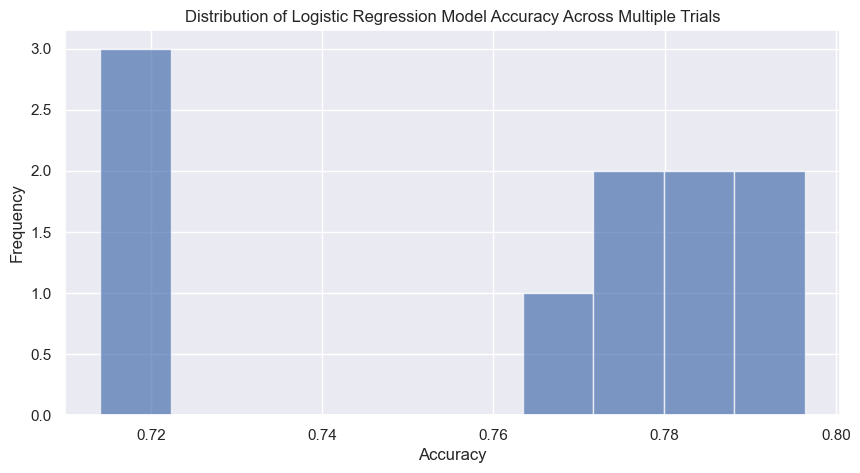

In [55]:
# Train and test the model multiple times
num_trials = 10
accuracies = []
for i in range(num_trials):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Plot the accuracy distribution
plt.hist(accuracies, bins=10, alpha=0.7)
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.title('Distribution of Logistic Regression Model Accuracy Across Multiple Trials')
plt.show()

## 05: Data driven insights & recommendations

### Project Outcome

There is a very weak correlation between a country's economic wellbeing and its suicide rate. However, since a relationship exists, a country's economic wellbeing can be considered a contributor towards suicide rate. For that, it answer our question on how economic wellbeing of the country affect the suicide rates across different demographic categories. 

### Something interesting

Through this project, we also found out something interesting, for the 5 countries that we used to determine the relationship between the two variables, we observed that the distribution of suicide/100k pop varies greatly across countries. This means there are other factors that are likely to be intangible that contribute to this difference.

### Based on Machine Learning results

Based on the results provided by our machine learning techniques on our data, we found that generally, men are more likely to die by suicide than women. This may be due in part to the fact that men are more likely to work in industries that are vulnerable to economic downturns, such as construction and manufacturing. Therefore, policies that aim to support men's mental health and reduce the stigma associated with seeking help can be effective in reducing suicide rates.